In [1]:
# This cell is needed if running from source directory without installing TinyQsim
import sys, os
sys.path.append(os.path.abspath('..'))

## Example 1: Tutorial Introduction to TinyQsim

### Purpose

This tutorial uses the simple example of a 2-qubit entangled state to demostrate some of the basic features of TinyQsim, including:
- Creating a quantum circuit
- Adding gates to the circuit
- Examining the quantum state
- Measuring one or more qubits
- Printing probabilities of measurement outcomes
- Printing counts of each state for a number of runs
- Plotting probabilities and counts as histograms

### Creating a Quantum Circuit

We will start by creating a quantum circuit with 2 qubits. By default, the circuit is initialized with all qubits equal to $\ket{0}$. If the option `init='random'` is given, the circuit is initialized with a random quantum state.

In [2]:
from tinyqsim.qcircuit import QCircuit

qc = QCircuit(2)  # State = |00>

The 'qc.state_vector' property can be used to peek at the quantum state. The state is not something that is observable in a real quantum system but we can see it in a simulation, which is very useful for understanding what is happening.

In [3]:
print(qc.state_vector)

[1 0 0 0]


The 4 elements of the state correspond to the projections onto the 4 orthogonal basis vectors $\ket{00}, \ket{01}, \ket{10}, \ket{11}$, so the state in this case is $\ket{00}$. 

It is easier to see that this vector corresponds to the state $\ket{00}$ if we use the 'components' method. This just prints values that are non-zero and it returns them as a dictionary of key-value pairs with the key corresponding to the label of the ket notation:

In [4]:
print(qc.components())

{'00': (1+0j)}


### Entangling the Qubits

The two qubits can be entangled using a Hadamard (H) gate and a controlled-NOT (CX) gate.

We will first add an X gate to configure the initial state by flipping qubit 1.

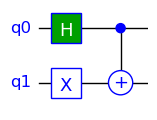

In [5]:
qc.x(1)      # Configure initial state
qc.h(0)      # Hadamard gate on qubit 0
qc.cx(0, 1)  # CX (controlled-NOT) gate
qc.draw()    # Draw the circuit

The Hadamard gate creates an equal superposition of $\ket{0}$ and $\ket{1}$:

$\qquad H \ket{0} = \frac{1}{\sqrt{2}}\ket{0} + \frac{1}{\sqrt{2}}\ket{1}$

The CX gate applies an X operation to the second input if the first input is $\ket{1}$. However, the first input of the CX gate is in a superposition, so the output is also in a superposition: 

$\begin{align*}
\qquad\ket{\psi}&={\scriptsize\frac{1}{\sqrt{2}}}\ket{0}(X\ket{0}) + {\scriptsize\frac{1}{\sqrt{2}}}\ket{1} (X (X\ket{0}))\\
&= {\scriptsize\frac{1}{\sqrt{2}}}\ket{01} + {\scriptsize\frac{1}{\sqrt{2}}}\ket{10} )
\end{align*}
$

If we print the new state, we can see that it agrees:

In [6]:
print(qc.components())

{'01': (0.70711+0j), '10': (0.70711+0j)}


This state can be written as $\frac{1}{\sqrt{2}}\ket{01} + \frac{1}{\sqrt{2}}\ket{10}$.

The state is entangled because the two qubits no longer have independent states. If we measure one of the two qubits, the result will have a 50% probability of being a 0 or 1, but the other qubit with then necessarily have the opposite value, even if we haven't measured it.

If we had omitted the X gate on qubit 1, we would have obtained a different entanglement where the two qubits had the same state instead of opposite states:

$\qquad\ket{\psi}= \frac{1}{\sqrt{2}}\ket{00} + \frac{1}{\sqrt{2}}\ket{11} )$

### Probabilities

The probabilities are the squares of the absolute values of the complex amplitudes, in this case $[0, \frac{1}{2},  \frac{1}{2}, 0]$. We can print the probabilities directly using the probabilities() method. By default, entries with zero probabilities are not included but can be added using the 'include_zeros' option.

In [7]:
print(qc.probabilities())

{'01': 0.5, '10': 0.5}


In [8]:
print(qc.probabilities(include_zeros=True))

{'00': 0.0, '01': 0.5, '10': 0.5, '11': 0.0}


Alternatively, the probabilities can be displayed as a histogram:

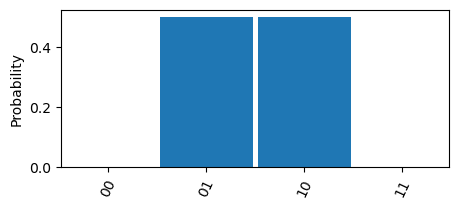

In [9]:
qc.plot_probabilities()

### Measurement

When we measure the state of a real quantum system, the state collapses into one of the basis states, with the outcome weighted according to the probabilites. In TinyQsim, we can perform such a measurement using the 'measure' method. The qubits to be measured can be given as an argument list or, if left blank, all qubits will be measured.

Let us measure qubit 0 of our entangled state:

In [10]:
print(qc.measure([0]))

[1]


If we now print the state again, we see that the state has collapsed to either the basis state $\ket{01}$ or $\ket{10}$:

In [11]:
print(qc.components())
print(qc.probabilities())

{'10': (1+0j)}
{'10': 1.0}


Qubit 1 has collapsed to the opposite state to qubit 0 even though we only measured qubit 0. We can confirm this by measuring qubit 1:

In [12]:
print(qc.measure([1]))

[0]


The measurements are shown as meters in the circuit schematic:

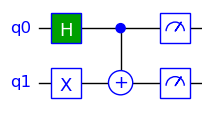

In [13]:
qc.draw()

### Counts

We can't measure the probabilities directly with a real quantum computer, but we can run the quantum program (experiment) many times and count the frequency with which each state occurs. As the number of runs increases, this approaches the true probabilities. In a real system we have to reinitialize the initial state and re-run the whole experiment each time. We can't just repeat the measurement because the first measurement collapses the state and so all subsequent measurements will return the same result.

TinyQsim provides a 'counts' method that allows us to simulate such as experiment for a specified number of runs. However, we first need to recreate our quantum circuit as we have just collapsed the state by calling 'measure':

In [14]:
qc = QCircuit(2)
qc.x(1)
qc.h(0)
qc.cx(0, 1)

We can now use 'counts' to perform a repeated experiment. By default, the experiment runs 1000 times. Note that the frequencies are different each time we run 'counts':

In [15]:
print(qc.counts())
print(qc.counts())
print(qc.counts())

{'01': 498, '10': 502}
{'01': 473, '10': 527}
{'01': 512, '10': 488}


The 'counts' method performs a 'what-if' measurement that does not collapse the state.

Alternatively, counts can be displayed as a histogram:

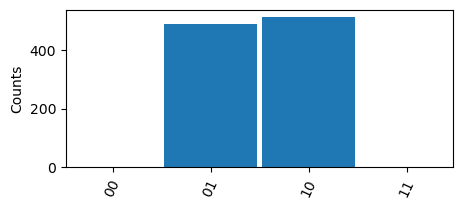

In [16]:
qc.plot_counts()

This is similar to the probability histogram except that it reflects the random nature of quantum measurements.

Although making quantum measurements is the only way to get a result on a real quantum computer, the probabilities are often all we need when using a simulator. They tell us the expected outcome if we were to run the program many times.